使用 numpy 和 pytorch 训练模型的对比

In [1]:
import numpy as np 
%matplotlib inline
from matplotlib import pyplot as plt 

In [2]:
np.random.seed(100)
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3 * np.power(x, 2) + 2 + 0.2 * np.random.rand(x.size).reshape(100, 1)

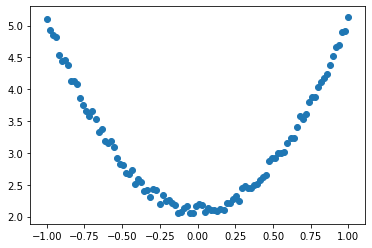

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
w1 = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)

In [5]:
lr = 0.001  # 学习率
for i in range(800):
    # 前向传播
    y_pred = np.power(x, 2) * w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    # 计算梯度
    grad_w = np.sum((y_pred - y) * np.power(x, 2))
    grad_b = np.sum((y_pred - y))
    # 使用梯度下降法, 使 loss 最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b
    

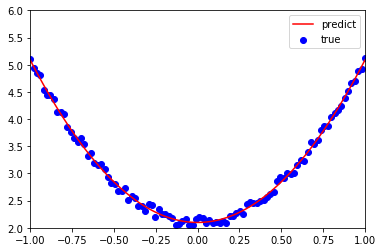

[[2.98927619]] [[2.09818307]]


In [7]:
plt.plot(x, y_pred, 'r-', label='predict')
plt.scatter(x, y, color='blue', marker='o', label='true')  # true data
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
print(w1, b1)

上面是使用 numpy 手动实现的, 下面使用 pytorch 实现

In [8]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt 

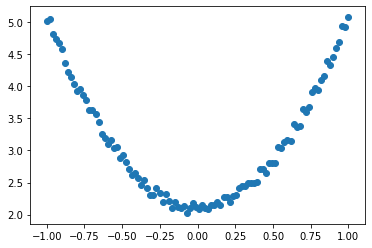

In [9]:
t.manual_seed(100)
dtype = t.float
x = t.unsqueeze(t.linspace(-1, 1, 100), dim=1)
y = 3 * x.pow(2) + 2 + 0.2 * t.rand(x.size())
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [10]:
w = t.randn(1, 1, dtype=dtype, requires_grad=True)
b = t.zeros(1, 1, dtype=dtype, requires_grad=True)

In [22]:
lr = 0.001
for ii in range(800):
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    # 自动计算梯度, 梯度存放在 grad 属性中
    loss.backward()
    # 手动更新参数
    with t.no_grad():  # 使上下文环境中切断自动求导的计算
        w -= lr * w.grad
        b -= lr * b.grad
        # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

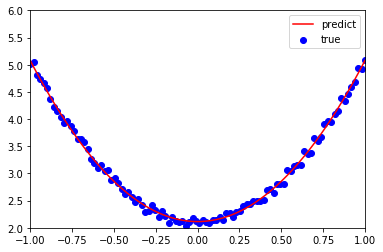

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [21]:
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
plt.scatter(x.numpy(), y.numpy(), color='blue', marker='o', label='true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
print(w, b)